In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\jg999\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jg999\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jg999\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [8]:
train = pd.read_csv("digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test = pd.read_csv("digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_train=train['label']

In [11]:
X_train=train.drop(labels=['label'], axis=1)

In [12]:
X_train.shape

(42000, 784)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

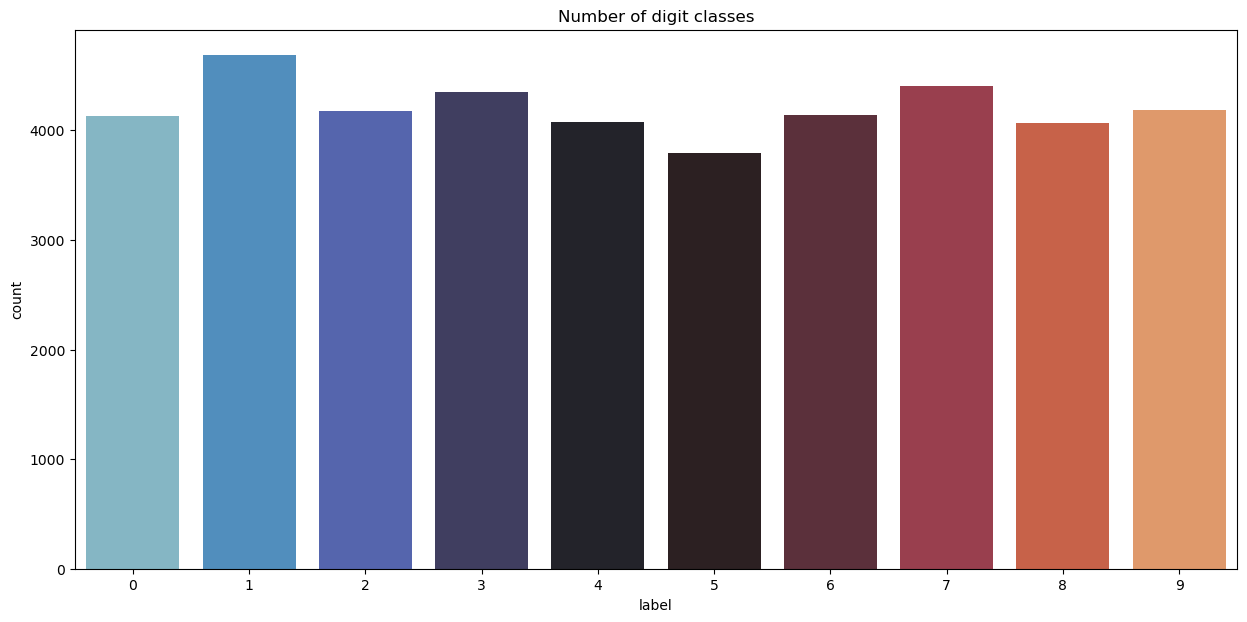

In [13]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [14]:
img=X_train.iloc[3].values
img=img.reshape((28,28))
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, '4')

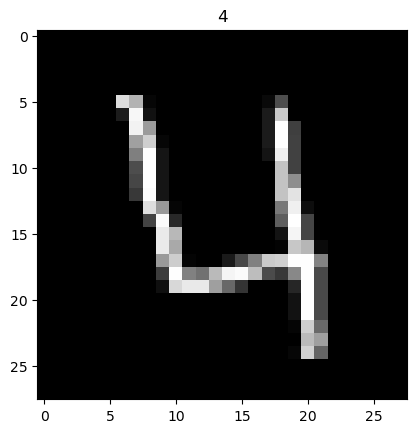

In [15]:
img.shape
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])

In [16]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [17]:
# x_train shape:  (42000, 784) -> (42000, 28, 28, 1)
# test shape:  (28000, 784) -> (28000, 28, 28, 1)

In [18]:
X_train=X_train.values.reshape(42000,28,28,1) #X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(28000,28,28,1)

In [19]:
X_train.shape

(42000, 28, 28, 1)

In [20]:
test.shape

(28000, 28, 28, 1)

In [21]:
from keras.utils.np_utils import to_categorical

In [22]:
Y_train=to_categorical(Y_train, 10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [24]:
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [25]:
X_train.shape

(37800, 28, 28, 1)

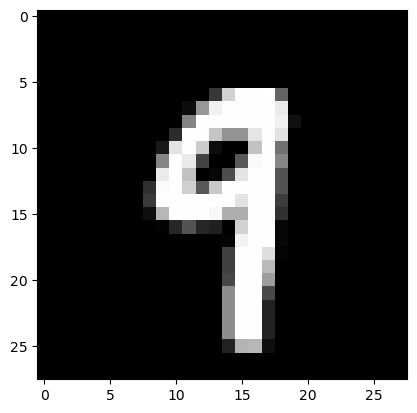

In [26]:
plt.imshow(X_train[2][:,:,0], cmap='gray')

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [28]:
model = Sequential()
#conv => max pool => dropout => conv => max pool => dropout => fully connected

In [29]:
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

In [30]:
model.add(MaxPool2D(pool_size=(2,2)))

In [31]:
#model.summary()
model.add(Dropout(0.25))

In [32]:
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

In [33]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [34]:
model.add(Dropout(0.25))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(256, activation = "relu"))

In [37]:
model.add(Dense(10, activation='softmax'))

In [38]:
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [39]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# 10개 데이터, batch size=2, epochs=3 
# 각 에폭에는 몇 번의 배치? 5번

In [41]:
epochs=10
batch_size=250

In [42]:
# 이미지를 증식하는 이유?
# 1) 부족한 데이터
# 2) 학습 데이터 많아짐 -> 오버피팅 감소, 정확도 향상 등

In [43]:
표준화 = (각 데이터 - 평균) / 표준편차

SyntaxError: invalid syntax (4109140857.py, line 1)

In [44]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [45]:
import cv2

In [46]:
cv2.imread("cat.jpg")
cv2.imread("cat.jpg").shape
img=cv2.cvtColor(cv2.imread("cat.jpg"), cv2.COLOR_BGR2RGB) #BGR -> RGB

In [47]:
def show_image(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')

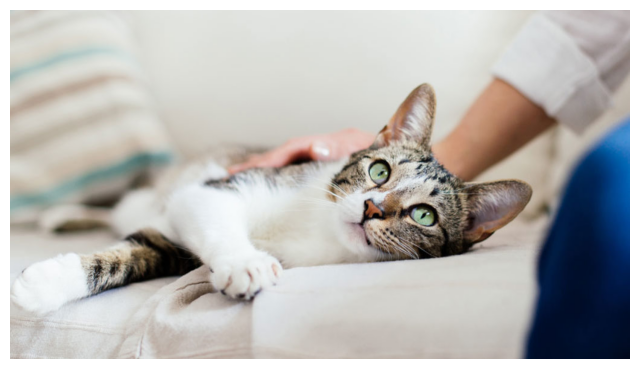

In [48]:
show_image(img)

In [49]:
data_generator = ImageDataGenerator(rotation_range=45.0) #-45~45도에서 랜덤하게 이미지가 회전

In [50]:
image_batch = np.expand_dims(img,axis=0)

In [51]:
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch) #이미지 증식 실행

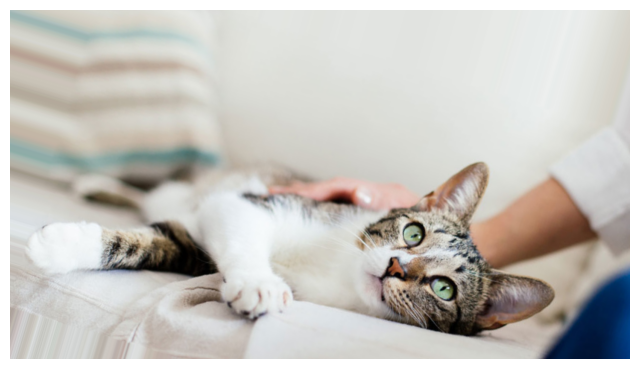

In [52]:
aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)
aug_image = aug_image.astype('int')
show_image(aug_image)

In [53]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 

datagen.fit(X_train)

In [54]:
#이미지 증식과 함께 모델 학습
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), 
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 11s 68ms/step - loss: 0.9628 - accuracy: 0.6896 - val_loss: 0.2346 - val_accuracy: 0.9219
Epoch 2/10
151/151 [==============================] - 10s 64ms/step - loss: 0.3412 - accuracy: 0.8938 - val_loss: 0.1334 - val_accuracy: 0.9624
Epoch 3/10
151/151 [==============================] - 10s 66ms/step - loss: 0.2434 - accuracy: 0.9248 - val_loss: 0.1139 - val_accuracy: 0.9657
Epoch 4/10
151/151 [==============================] - 9s 63ms/step - loss: 0.1967 - accuracy: 0.9382 - val_loss: 0.1028 - val_accuracy: 0.9707
Epoch 5/10
151/151 [==============================] - 10s 65ms/step - loss: 0.1740 - accuracy: 0.9456 - val_loss: 0.0863 - val_accuracy: 0.9745
Epoch 6/10
151/151 [==============================] - 10s 63ms/step - loss: 0.1525 - accuracy: 0.9529 - val_loss: 0.0741 - val_accuracy: 0.9786
Epoch 7/10
151/151 [==============================] - 10s 63ms/step - loss: 0.1373 - accuracy: 0.9572 - val_loss: 0.0668 - val_accuracy: 

In [55]:
y_pred=model.predict(X_val)
y_pred_cls=np.argmax(y_pred,1)
y_true=np.argmax(Y_val, axis=1)

132/132 [==============================] - 1s 3ms/step


In [59]:
test_pred=model.predict(test)
y_test_pred=np.argmax(test_pred,axis=1)
y_test_pred
y_test_pred.shape
sub=pd.read_csv("digit-recognizer/sample_submission.csv")
sub.head()
output = pd.DataFrame({'ImageId': sub.ImageId, 'Label': y_test_pred})
output.to_csv('digit-recognizer/submission.csv', index=False)

875/875 [==============================] - 3s 4ms/step
